## 1er parcial pregunta 41 - DataSet FullBank - Clasificación
# NAVA SIÑANI KELVIN


In [115]:
#montamos la carpeta drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
#Se importan las librerias que se haran uso
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
from matplotlib import pyplot
# Modulo de optimización de scipy
from scipy import optimize
import pandas as pd
from sklearn import preprocessing
import csv
%matplotlib inline

In [117]:
#cargado de datos
df = pd.read_csv("/content/drive/MyDrive/bank-full.csv", sep=";")
#uso de diccionarios para cambiar los datos
diccionario = {"no": 0, "yes": 1}
df["y"] = df["y"].replace(diccionario)#se crea el diccionario y a la columna de "y" se cambia sus valores por 0, 1 (yes=1, no=0)
diccionario = {"no": 1, "yes": 2}
df["housing"] = df["housing"].replace(diccionario) # se cambia los valores a la columna de housing (yes=1, no=0)
diccionario2 = {"married": 1, "single": 2, "divorced":3}
df["marital"] = df["marital"].replace(diccionario2) # se cambia los valores a la columna marital ("married": 1, "single": 2, "divorced":3)
diccionario3 = {"unknown": 1, "cellular": 2, "telephone":3}
df["contact"] = df["contact"].replace(diccionario3) # se cambia los valores a la columna contact ("unknown": 1, "cellular": 2, "telephone":3)
diccionario4 = {"ene": 1, "feb": 1, "mar":2, "apr":3, "may":4, "jan":1, "jul":67, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12,"jun":6}
df["month"] = df["month"].replace(diccionario4) # se cambia los valores a la columna month
diccionario5 = {"unknown": 12, "blue-collar": 1, "management":2, "technician":3, "admin.":4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11}
df["job"] = df["job"].replace(diccionario5)  # se cambia los valores a la columna job
diccionario5 = {"unknown": 4, "tertiary": 1, "primary":2, "secondary":3}
df["education"] = df["education"].replace(diccionario5) # se cambia los valores a la columna education
diccionario5 = {"unknown": 4, "failure": 1, "other":2, "success":3}
df["poutcome"] = df["poutcome"].replace(diccionario5) # se cambia los valores a la columna putcome
#se eliminan los datos que entran en conflicto con las operaciones
df = df.drop('default', axis=1)
df = df.drop('loan', axis=1)
df.drop_duplicates()
df.dropna(axis=0, thresh=2) #Elimina filas con n o más valores nulos.

#se asigna el 80% para train y el 20% para test
X_train = df.iloc[:36169, :-1]
X_test = df.iloc[36169:, :-1]
y_train = df.iloc[:36169, df.columns.get_loc("y")]
y_test = df.iloc[36169:, df.columns.get_loc("y")]

X=X_train
y=y_train

print(X)
print(y)

       age  job  marital  education  balance  housing  contact  day  month  \
0       58    2        1          1     2143        2        1    5      4   
1       44    3        2          3       29        2        1    5      4   
2       33    8        1          3        2        2        1    5      4   
3       47    1        1          4     1506        2        1    5      4   
4       33   12        2          4        1        1        1    5      4   
...    ...  ...      ...        ...      ...      ...      ...  ...    ...   
36164   54    3        3          3     1252        2        2   11      4   
36165   40    2        1          1      -17        2        2   11      4   
36166   45    1        1          4      -72        2        2   11      4   
36167   41    7        2          1      428        2        2   11      4   
36168   35    1        2          3       41        2        2   11      4   

       duration  campaign  pdays  previous  poutcome  
0       

# **Se crea la función sigmoid**

In [118]:
#genera un número entre 0 y 1
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

In [119]:
#pruba de la funcion
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [120]:
#devuelve 0 o 1
def decision(probabilidad):
  punto_corte = 0.5
  return np.where(probabilidad >= punto_corte, 1, 0)

In [121]:
#normalizamos los datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [122]:
X_norm, mu, sigma = featureNormalize(X)

In [123]:
#Agrega la columna de 1
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [124]:
def calcularCosto(theta, X, y):
    m = y.size
    lambda_ = 0.1
    J = 0
    h = sigmoid(X.dot(theta.T))
    temp = theta
    temp[0] = 0
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))  + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J

In [125]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta calculado por el descenso por el gradiente: [ 0.         -0.00622019  0.01198971  0.03350367 -0.02954882  0.01593752
 -0.0501656   0.08835569  0.012962   -0.05640743  0.54464761  0.0029304
 -0.00825496  0.00073857  0.01234136]


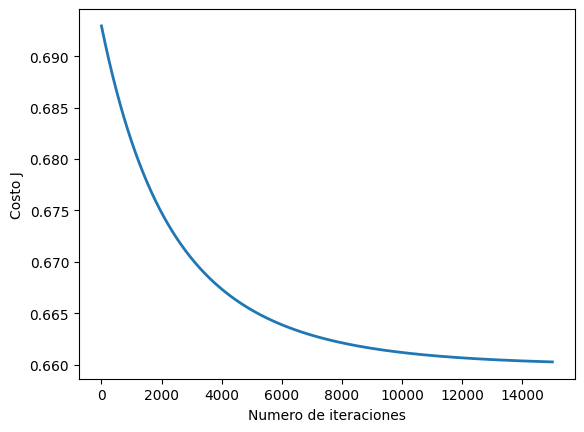

In [126]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 15000

num_features = X.shape[1]
# inicializa theta y ejecuta el descenso por el gradiente np.zeros(15) son 16 columnas pero una fue omitida
theta = np.zeros(15)
print(theta)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [127]:
X_test, mu, sigma = featureNormalize(X_test)
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)
aprueba = sigmoid(np.dot(X_test, theta))


In [128]:
#Test con el 20% de datos
probabilidad = sigmoid(np.dot(X_test, theta))
resultado = decision(probabilidad)
print(resultado)
print(y_train)

[0 0 1 ... 1 1 1]
0        0
1        0
2        0
3        0
4        0
        ..
36164    0
36165    1
36166    0
36167    0
36168    0
Name: y, Length: 36169, dtype: int64


In [129]:
#
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [130]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 4.32732450e-01  3.66702823e-03 -4.53067277e-03 -1.10467743e-02
  9.37781263e-03 -7.11944194e-03  1.39932145e-02 -1.86065755e-02
  5.63104747e-05  4.50699800e-03 -1.15565577e-01  8.24986592e-03
  1.48313396e-03 -6.50982324e-05 -1.90783953e-03]
Gradiente en theta inicial (zeros):
	[0.4327, 0.0037, -0.0045]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [131]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array(X[1])

print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[ 1.          0.32734221 -0.23025329  0.71729697  0.73830392 -0.43323871
  0.85677236 -1.24206996 -1.31055339 -0.51943562 -0.40144511 -0.57728007
 -0.31466723 -0.15823231  0.33461018]
Costo en theta prueba: 1.951
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.546, 0.005, -0.037]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [132]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuelve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

<ipython-input-132-d17edb1aa764>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-129-db440af18730>:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


Costo con un valor de theta encontrado por optimize.minimize: 0.174
Costo esperado (aproximado): 0.203

theta:
	[-3.362, -0.073, 0.036]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


In [133]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [142]:
#  Predice la probabilidad de suscripción de un cliente a una cuenta bancaria
prob = sigmoid(np.dot([1,24,3,1,1,1520,0,1,5,4,0,0,-1,0,4], theta))
print('Para un cliente con los datos introducidos se predice una probabilidad de sucripción de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un cliente con los datos introducidos se predice una probabilidad de sucripción de: 1.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 93.78 %
Precisión esperada (aproximadamente): 89.00 %
